In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Initialising values here
# Theta Values in degree

tf = 0
t0 = 90
t1 = 0
te = 0

# Theta Values in radians

tf = tf/180*np.pi
t0 = t0/180*np.pi
t1 = t1/180*np.pi
te = te/180*np.pi

# Translational Elementsin inches

a0 = 3
a1 = 3
a2 = 3
ae = 3

# del theta change in angles

dT0 = 0.001

t0_1 = t0 + dT0
t1_1 = t1 + dT0
te_1 = te + dT0

# p is set distance
p = 0.01
q = 0.05

# Desired values
# Traslation vectors x,y,z are
x_des = -3
y_des = -8
phi_des = 90

phi_des = phi_des/180*np.pi
e_des = np.matrix([[x_des],\
                   [y_des],\
                   [phi_des]])

inside = True

In [36]:
def end_eff_pos(t0,t1,te):
    # Parameter table with columns " theta, alpha, r or a, d 
    
    param_tab = [[tf ,      0         ,  -a0   ,  0  ],
                 [t0 ,      0         ,  -a1   ,  0  ],
                 [t1 ,      0         ,  -a2   ,  0  ],
                 [te ,      0         ,  -ae   ,  0  ]]
    
    # Transformation matrix

    i=0
    T0_1 = [[np.cos(param_tab[i][0]) , -np.cos(param_tab[i][1])*np.sin(param_tab[i][0]), np.sin(param_tab[i][1])*np.sin(param_tab[i][0])  , param_tab[i][2]*np.cos(param_tab[i][0])],
            [np.sin(param_tab[i][0]) , np.cos(param_tab[i][1])*np.cos(param_tab[i][0]) , -np.sin(param_tab[i][1])*np.cos(param_tab[i][0]) , param_tab[i][2]*np.sin(param_tab[i][0])],
            [           0            ,            np.sin(param_tab[i][1])              ,       np.cos(param_tab[i][1])                    ,     param_tab[i][3]                    ],
            [0  ,  0  ,  0  ,  1 ]]

    i=1
    T1_2 = [[np.cos(param_tab[i][0]) , -np.cos(param_tab[i][1])*np.sin(param_tab[i][0]), np.sin(param_tab[i][1])*np.sin(param_tab[i][0])  , param_tab[i][2]*np.cos(param_tab[i][0])],
            [np.sin(param_tab[i][0]) , np.cos(param_tab[i][1])*np.cos(param_tab[i][0]) , -np.sin(param_tab[i][1])*np.cos(param_tab[i][0]) , param_tab[i][2]*np.sin(param_tab[i][0])],
            [           0            ,            np.sin(param_tab[i][1])              ,       np.cos(param_tab[i][1])                    ,     param_tab[i][3]                    ],
            [0  ,  0  ,  0  ,  1 ]]

    i=2
    T2_3 = [[np.cos(param_tab[i][0]) , -np.cos(param_tab[i][1])*np.sin(param_tab[i][0]), np.sin(param_tab[i][1])*np.sin(param_tab[i][0])  , param_tab[i][2]*np.cos(param_tab[i][0])],
            [np.sin(param_tab[i][0]) , np.cos(param_tab[i][1])*np.cos(param_tab[i][0]) , -np.sin(param_tab[i][1])*np.cos(param_tab[i][0]) , param_tab[i][2]*np.sin(param_tab[i][0])],
            [           0            ,            np.sin(param_tab[i][1])              ,       np.cos(param_tab[i][1])                    ,     param_tab[i][3]                    ],
            [0  ,  0  ,  0  ,  1 ]]
    
    i=3
    T3_4 = [[np.cos(param_tab[i][0]) , -np.cos(param_tab[i][1])*np.sin(param_tab[i][0]), np.sin(param_tab[i][1])*np.sin(param_tab[i][0])  , param_tab[i][2]*np.cos(param_tab[i][0])],
            [np.sin(param_tab[i][0]) , np.cos(param_tab[i][1])*np.cos(param_tab[i][0]) , -np.sin(param_tab[i][1])*np.cos(param_tab[i][0]) , param_tab[i][2]*np.sin(param_tab[i][0])],
            [           0            ,            np.sin(param_tab[i][1])              ,       np.cos(param_tab[i][1])                    ,     param_tab[i][3]                    ],
            [0  ,  0  ,  0  ,  1 ]]
    
    
    # End Effector Position
    
    # O0_N = T0_N[0:3,3]
    
    # Pitch-Roll-Yaw Angles Respectively
    
    # theta0_N = np.arcsin(-T0_N[2][0])
    # psi0_N = np.arccos((T0_N[2][2])/np.cos(theta0_N))
    # phi0_N = np.arccos((T0_N[0][0])/np.cos(theta0_N))
    
    # Finding T0_3 matrix
    
    T0_2 = np.round(np.dot(T0_1,T1_2),2)
    T0_3 = np.round(np.dot(T0_2,T2_3),2)
    T0_4 = np.round(np.dot(T0_3,T3_4),2)
    '''
    T0_2 = np.dot(T0_1,T1_2)
    T0_3 = np.dot(T0_2,T2_3)
    T0_4 = np.dot(T0_3,T3_4)
    '''
    
    '''
    print(T0_1)
    print(T0_2)
    print(T0_3)
    print(T0_4)
    '''
    O0_1 = np.matrix(T0_1)[0:3,3]
    O0_2 = np.matrix(T0_2)[0:3,3]
    O0_3 = np.matrix(T0_3)[0:3,3]
    O0_4 = np.matrix(T0_4)[0:3,3]  # End Effector position
    
    theta0_4 = np.arcsin(-T0_4[2][0])
    psi0_4 = np.arccos((T0_4[2][2])/np.cos(theta0_4))
    phi0_4 = np.arccos((T0_4[0][0])/np.cos(theta0_4))
    '''
    #phi0_4 = phi0_4*180/np.pi
    print(theta0_4)
    print(psi0_4)
    print(phi0_4)
    print(O0_4)
    '''
    
    # Plotting Y and Z axis
    #plt.plot(0,0,'ko') 
    #plt.plot(np.squeeze(np.asarray(O0_1[0][0])), np.squeeze(np.asarray(O0_1[1][0])), 'g>')
    #plt.plot(np.squeeze(np.asarray(O0_2[0][0])), np.squeeze(np.asarray(O0_2[1][0])), 'c>')
    #plt.plot(np.squeeze(np.asarray(O0_3[0][0])), np.squeeze(np.asarray(O0_3[1][0])), 'b>')
    #plt.plot(np.squeeze(np.asarray(O0_4[0][0])), np.squeeze(np.asarray(O0_4[1][0])), 'y>')

    req_e = np.matrix([[np.squeeze(np.asarray(O0_4[0][0]))],\
               [np.squeeze(np.asarray(O0_4[1][0]))],\
               [phi0_4]])
    return req_e

In [37]:
ini_pos = end_eff_pos(t0,t1,te)


In [38]:
def sign(a,b):
    return np.sign(np.subtract(a,b))

In [ ]:
while inside:


In [40]:
#for i in range (0,100):
while inside:
#if inside:
    e = end_eff_pos(t0,t1,te)
    
    
    # End effector values for small change in respective theta values
    e_t0 = end_eff_pos(t0_1,t1,te)
    e_t1 = end_eff_pos(t0,t1_1,te)
    e_te = end_eff_pos(t0,t1,te_1)
    
    e_del_t0 = np.subtract(e,e_t0)
    e_del_t1 = np.subtract(e,e_t1)
    e_del_te = np.subtract(e,e_te)
    
    '''
    print('end eff vals')
    print(e)
    print(e_t0)
    print(e_t1)
    print(e_te)
       
    print('theta vals')
    print(t0)
    print(t1)
    print(te)
    
    print('e delvals')
    print(e_del_t0)
    print(e_del_t1)
    print(e_del_te)
    '''
        
    J = np.matrix([[np.squeeze(np.asarray(e_del_t0[0][0])) , np.squeeze(np.asarray(e_del_t1[0][0])) , np.squeeze(np.asarray(e_del_te[0][0]))],\
                   [np.squeeze(np.asarray(e_del_t0[1][0])) , np.squeeze(np.asarray(e_del_t1[1][0])) , np.squeeze(np.asarray(e_del_te[1][0]))],\
                   [np.squeeze(np.asarray(e_del_t0[2][0])) , np.squeeze(np.asarray(e_del_t1[2][0])) , np.squeeze(np.asarray(e_del_te[2][0]))],])
    
    print(J)

    
    J_inv = np.linalg.inv(J)
    
    #print(J_inv)
    
    
    
    
    # Finding new End effector position
    
    sign_x = sign((np.squeeze(np.asarray(e_des[0][0]))) , np.squeeze(np.asarray(e[0][0])))
    sign_y = sign((np.squeeze(np.asarray(e_des[1][0]))) , np.squeeze(np.asarray(e[1][0])))
    sign_phi = sign((np.squeeze(np.asarray(e_des[2][0]))) , np.squeeze(np.asarray(e[2][0])))
    
    # p is set distance
    x_p = np.squeeze(np.asarray(e[0][0])) + p*sign_x
    y_p = np.squeeze(np.asarray(e[1][0])) + p*sign_y
    phi_p = np.squeeze(np.asarray(e[2][0])) + p*sign_phi
    '''
    sub_x = np.subtract((np.squeeze(np.asarray(e_des[0][0]))) , np.squeeze(np.asarray(e[0][0])))
    sub_y = np.subtract((np.squeeze(np.asarray(e_des[1][0]))) , np.squeeze(np.asarray(e[1][0])))
    sub_phi = np.subtract((np.squeeze(np.asarray(e_des[2][0]))) , np.squeeze(np.asarray(e[2][0])))
    
    p=0.01
    x_p = np.squeeze(np.asarray(e[0][0])) + p*sub_x
    y_p = np.squeeze(np.asarray(e[1][0])) + p*sub_y
    phi_p = np.squeeze(np.asarray(e[2][0])) + p*sub_phi
    '''
    e_del_x = np.squeeze(np.asarray(e[0][0])) - x_p
    e_del_y = np.squeeze(np.asarray(e[1][0])) - y_p
    e_del_phi = np.squeeze(np.asarray(e[2][0])) - phi_p
    
    #  e_del_norm = np.dot([[e_del_x],[e_del_y],[e_del_phi]],0.01)
    
    e_del_norm = np.matrix([[e_del_x],[e_del_y],[e_del_phi]])
    
    #print(e_del_norm)
    
    t_del = np.dot(J_inv,e_del_norm)
    
    #print()    
    #print(t_del)
    t_del0 = np.squeeze(np.asarray(t_del[0][0]))
    t_del1 = np.squeeze(np.asarray(t_del[1][0]))
    t_dele = np.squeeze(np.asarray(t_del[2][0]))
    
    t_new = np.add([[t0],[t1],[te]],t_del)
    
    t0 = np.squeeze(np.asarray(t_new[0][0]))
    t1 = np.squeeze(np.asarray(t_new[1][0]))
    te = np.squeeze(np.asarray(t_new[2][0]))
    
    
    t0_0 = t0 + dT0
    t0_1 = t1 + dT0
    t0_e = te + dT0
    
    '''
    print('New vals')
    print(x_p)
    print(y_p)
    print(phi_p)
    print(t_new)
    
    print('----------------------')
    '''
    
    met = np.sqrt(((np.squeeze(np.asarray(e[0][0])))-(np.squeeze(np.asarray(e_des[0][0]))))**2 +\
                  ((np.squeeze(np.asarray(e[1][0])))-(np.squeeze(np.asarray(e_des[1][0]))))**2)
    
    # Plot 
    plt.plot(0,0,'ko')
    plt.plot(np.squeeze(np.asarray(ini_pos[0][0])), np.squeeze(np.asarray(ini_pos[1][0])), 'yo')    
    plt.plot(np.squeeze(np.asarray(e[0][0])), np.squeeze(np.asarray(e[1][0])), 'r>')
    #plt.plot(np.squeeze(np.asarray(x_p)), np.squeeze(np.asarray(y_p)), 'k>')
    plt.plot(np.squeeze(np.asarray(e_des[0][0])), np.squeeze(np.asarray(e_des[1][0])), 'bo')
    plt.show
    
    if met < 0.3 : inside = False
    


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


LinAlgError: Singular matrix

In [28]:
e = end_eff_pos(t0,t1,te)
e

matrix([[-7.8835668 ],
        [-4.31395665],
        [ 1.54199219]])

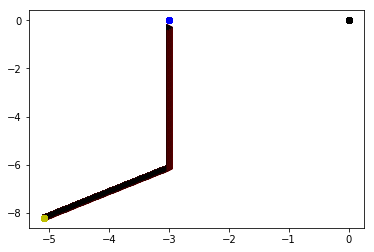

In [636]:
while inside:
    
    sign_x = sign((np.squeeze(np.asarray(e_des[0][0]))) , np.squeeze(np.asarray(e[0][0])))
    sign_y = sign((np.squeeze(np.asarray(e_des[1][0]))) , np.squeeze(np.asarray(e[1][0])))
    sign_phi = sign((np.squeeze(np.asarray(e_des[2][0]))) , np.squeeze(np.asarray(e[2][0])))
    
    # p is set distance
    x_p = np.squeeze(np.asarray(e[0][0])) + p*sign_x
    y_p = np.squeeze(np.asarray(e[1][0])) + p*sign_y
    phi_p = np.squeeze(np.asarray(e[2][0])) + p*sign_phi
    
    e[0][0] = x_p
    e[1][0] = y_p
    
    plt.plot(0,0,'ko')
    plt.plot(np.squeeze(np.asarray(ini_pos[0][0])), np.squeeze(np.asarray(ini_pos[1][0])), 'yo')    
    plt.plot(np.squeeze(np.asarray(e[0][0])), np.squeeze(np.asarray(e[1][0])), 'r>')
    #plt.plot(np.squeeze(np.asarray(x_p)), np.squeeze(np.asarray(y_p)), 'k>')
    plt.plot(np.squeeze(np.asarray(e_des[0][0])), np.squeeze(np.asarray(e_des[1][0])), 'bo')
    plt.show
    
    
    met = np.sqrt(((np.squeeze(np.asarray(e[0][0])))-(np.squeeze(np.asarray(e_des[0][0]))))**2 +\
                  ((np.squeeze(np.asarray(e[1][0])))-(np.squeeze(np.asarray(e_des[1][0]))))**2)
    
    
    if met < 0.3 : inside = False
    

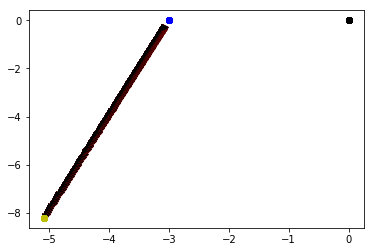

In [641]:
while inside:
    
    sub_x = np.subtract((np.squeeze(np.asarray(e_des[0][0]))) , np.squeeze(np.asarray(e[0][0])))
    sub_y = np.subtract((np.squeeze(np.asarray(e_des[1][0]))) , np.squeeze(np.asarray(e[1][0])))
    sub_phi = np.subtract((np.squeeze(np.asarray(e_des[2][0]))) , np.squeeze(np.asarray(e[2][0])))
    
    p=0.01
    x_p = np.squeeze(np.asarray(e[0][0])) + p*sub_x
    y_p = np.squeeze(np.asarray(e[1][0])) + p*sub_y
    phi_p = np.squeeze(np.asarray(e[2][0])) + p*sub_phi
    
    e[0][0] = x_p
    e[1][0] = y_p
    
    plt.plot(0,0,'ko')
    plt.plot(np.squeeze(np.asarray(ini_pos[0][0])), np.squeeze(np.asarray(ini_pos[1][0])), 'yo')    
    plt.plot(np.squeeze(np.asarray(e[0][0])), np.squeeze(np.asarray(e[1][0])), 'r>')
    plt.plot(np.squeeze(np.asarray(x_p)), np.squeeze(np.asarray(y_p)), 'k>')
    plt.plot(np.squeeze(np.asarray(e_des[0][0])), np.squeeze(np.asarray(e_des[1][0])), 'bo')
    plt.show
    
    
    met = np.sqrt(((np.squeeze(np.asarray(e[0][0])))-(np.squeeze(np.asarray(e_des[0][0]))))**2 +\
                  ((np.squeeze(np.asarray(e[1][0])))-(np.squeeze(np.asarray(e_des[1][0]))))**2)
    
    
    if met < 0.3 : inside = False
    

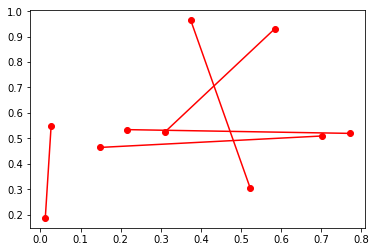

In [648]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.random.random(size=(2,1))

for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')

plt.show()